GRUPO A1

Lucía Chicharro Saugar, María Montero Gómez, Patricia Ramos Gamarra y Lydia Sánchez-Cano Sánchez



# **Diseño, Entrenamiento y Test de un Sistema de Redes de Neuronas  Artificiales.**

El objetivo es crear un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes  tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

Para ello crearemos un modelo en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST.Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución
(28 x 28 píxeles).

La clasificación la haremos según la siguiente tabla:


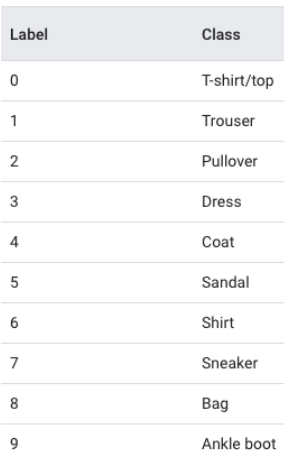

In [1]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


Cargamos el conjunto de datos que vamos a utilizar.

In [2]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS Fashion_MNIST EN KERAS
# fashion-mnist = tf.keras.datasets.fashion_mnist
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

`train_images y train_labels ` son las imágenes y las etiquetas que vamos a usar como conjunto de entrenamiento.

En el caso de `test_images, test_labels` , hacen referencia a las imágenes y las etiquetas de test que se usarán cuando el modelo ya esté entrenado.

In [3]:
print(train_images.shape)

(60000, 28, 28)


Como ya sabíamos, utilizamos 60000 imágenes de entramiento de 28*28 píxeles.

In [4]:
print(test_images.shape)

(10000, 28, 28)


En el caso de las imágenes de test, tenemos 10000 imágenes de 28*28 píxeles.

In [5]:
# Vemos la matriz de la imagen número 40.000 (28x28)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[40000]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [6]:
# La imagen anterior corresponde con la categoría 7, que es un zapato como podíamos ver anteriormente.
train_labels[40000]

7

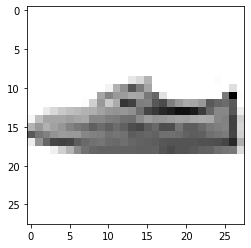

In [7]:
# Veamos el elemento 40000 de las imágenes de entrenamiento y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[40000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [8]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

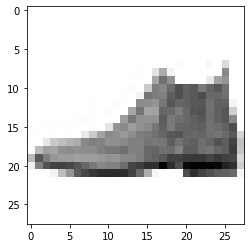

In [9]:
#Veamos el elemento de la posición 0 de las imágenes de test y pintémoslo con matplotlib (debe pertener a la categoría 9 que son botines)
import matplotlib.pyplot as plt
digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

**CONSTRUIMOS LA RNA**


*Preparamos los datos*

Layers presenta una función llamada Flatten , cuya utilidad es aplanar la entrada sin afectar al tamaño del lote.

`tf.keras.layers.Flatten(data_format=None, **kwargs)`

Aplanar un tensor es eliminar todas las dimensiones excepto una.

Para que nuestra red converja más facilmente, normalizaremos los datos de entrenamiento y de test evitando así que sean heterogéneos de rango. Convertiremos nuestros datos en una matriz `float32` de la forma `(60000, 28 * 28)` que toma valores en `[0,1]`

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


También tenemos que codificar categóricamente las etiquetas. Para ello, usaremos el one-hot encoding. En este caso transformaremos el vector en un vector de 10 ceros con un 1 en la posición que corresponda a la etiqueta.


In [11]:
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
#En el caso de la etiqueta 40000 ( que sabemos que era de la categoría 7) obtendríamos:
train_labels[40000]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

***Caso 1***

Nº neuronas primera capa:10

Fución de activación: `'relu'`

Optimizador: `'sgd'`

In [13]:
# CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models
from keras import layers

# La red será secuencial (de la entrada a la salida sin ciclos).
model = models.Sequential()
# En el primer caso , la capa 1 tiene 10 neuronas (que son las mínimas necesarias en este caso al tener 10 categorías) , 
#la función de activación es 'relu' y el optimizador 'sgd'.
model.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
# Las capas Dense nos indica que cada neurona está conectada con cada uno de los 784 píxeles.
model.add(layers.Dense(10, activation='relu'))
#En la capa de salida debemos emplear 10 neuronas cada una correspondiente a una categoría.
#Además, la función de activación debe ser softmax ya que queremos que nos devuelva una distribución de probabilidad sobre las 10 clases.
model.add(layers.Dense(10, activation='softmax'))
model.summary()
#Tras realizar el summary observamos que el nombre de las capas es automático ya que no hemos definido uno. 
# El 7850 es el resultado de 784 (píxeles) * 10 (neuronas) + 10 (Sesgo)
# 110 es el resultado de 10*10 + 10(Sesgo). Este valor hace referencia a la capa oculta y a la de salida.
# 8070 es el resultado de 7850 + 110 ( capa intermedia) + 110 (capa de salida)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


Pasemos a definir la función de activación , de pérdida y la métrica.

In [14]:
# Compilamos
model.compile(optimizer='sgd', # cargamos el optimizador 'sgd' (Stocastic Gradient Descendent)
              loss='categorical_crossentropy',#'categorical_crossentropy' es la función de pérdida que se utiliza como señal
                                              # de retroalimentación para aprender los tensores de peso 
                                              #Mide la distancia entre dos distribuciones de probabilidad (entre la distribución de probabilidad de salida de nuestra red y la distribución real de las etiquetas)
              metrics=['accuracy']) # 'accuracy': Solo tendremos en cuenta la fracción de imágenes que son
                                    # correctamente clasificadas 

Ya estamos listos para entrenar a la red.

In [15]:
#Entrenamos la red
# epochs: Épocas:"una pasada sobre todo el conjunto de datos",separara el entrenamiento en distintas fases para el registro y la evaluación periódica.
#En cada iteración, la red calculará los gradientes de los pesos y ajustará los pesos 
#Al final de las iteraciones veremos que la red es capaz de clasificar las fotos según la categoría correspondiente.
history=model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 6ms/step - loss: 1.8067 - accuracy: 0.3456
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 1.1097 - accuracy: 0.5979
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.7983 - accuracy: 0.7041
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.7047 - accuracy: 0.7401
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6522 - accuracy: 0.7651


En nuestros datos de entrenamiento, obtenemos una pérdida de alrededor de un 65% y una precisión de alrededor de un 77%.

In [16]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.6630 - accuracy: 0.7597
test_loss: 0.6630309224128723
test_acc: 0.7597000002861023


La precisión en nuestro conjunto de prueba es de un 76% aproximadamente(algo más baja que en los datos de entrenamiento) y la pérdida es de un 66% (talgo más alta que la pérdida en los de entrenamiento).

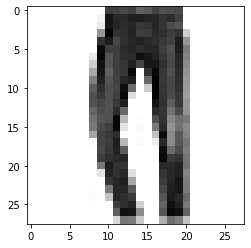

In [17]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  

313/313 [==============================] - 1s 2ms/step


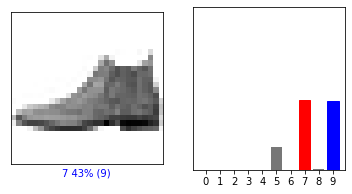

<Figure size 432x288 with 0 Axes>

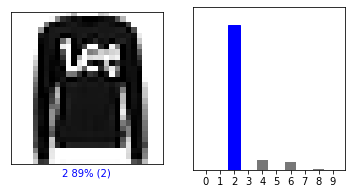

<Figure size 432x288 with 0 Axes>

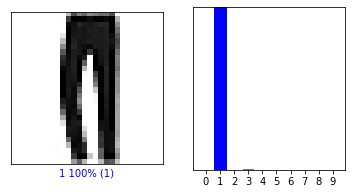

<Figure size 432x288 with 0 Axes>

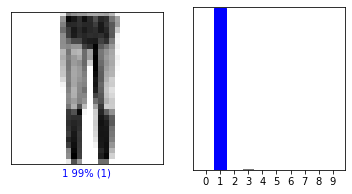

<Figure size 432x288 with 0 Axes>

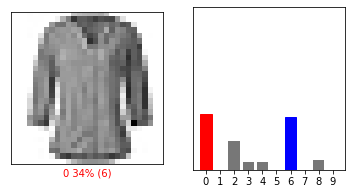

<Figure size 432x288 with 0 Axes>

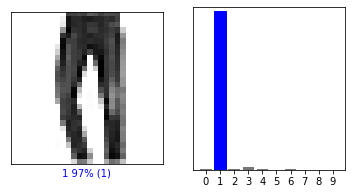

<Figure size 432x288 with 0 Axes>

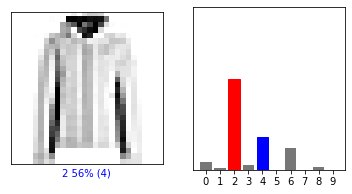

<Figure size 432x288 with 0 Axes>

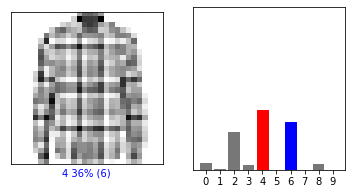

<Figure size 432x288 with 0 Axes>

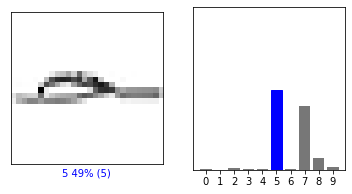

<Figure size 432x288 with 0 Axes>

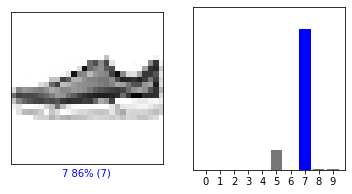

<Figure size 432x288 with 0 Axes>

In [19]:
# graficamos los 10 primeros elementos para ver cómo de bien o de mal se comporta nuestro modelo.
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = model.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

En el primer caso,la red clasifica la imagen con un 43% como perteneciente a la categoría 7 aunque realmente pertenece a la categoría 5. Sin embargo, existen casos como la tercera imagen o la cuarta en los que se clasifica correctamente con un 99% o incluso 100% de precisión.

Finalmente, generaremos una predicción sobre el sexto elemento de nuestro conjunto de test.

In [20]:
import numpy as np
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))

=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.   0.97 0.   0.01 0.   0.   0.   0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


Con un 97% nuestra red determina correctamente que la imagen pertenece a la categroría 1.

*Conclusiones caso 1:*
Puesto que al entrenar la red se obtiene una pérdida muy alta y muy cercana al valor de precisión, sería necesario modificar ciertos hiperparámetros de la red para mejorar su eficacia.

***Caso 2 (5 épocas)***

Nº neuronas primera capa:10

Fución de activación: `'relu'`

Optimizador: `'rmsprop'`

In [21]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
#CASO 2 5 ÉPOCAS


# CONSTRUIMOS LA ARQUITECTURA DE LA RED
# El tipo de red será secuencial.
model1 = models.Sequential()
# En el primer caso , la capa 1 tiene 10 neuronas , la función de activación es relu y el optimizador rmsprop.
model1.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
model1.add(layers.Dense(10, activation='relu'))
#En la capa de salida, la función de activación debe ser softmax ya que queremos que nos devuelva una distribución de probabilidad sobre las 10 clases.
model1.add(layers.Dense(10, activation='softmax'))
#Los datos de summary vuelven a ser los mismos ya que no hemos modificado el número de neuronas.
model1.summary()

model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Entrenamos el modelo
model1.fit(train_images, train_labels, epochs=5, batch_size=128)

#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.9360 - accuracy: 0.6930
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5378 - accuracy: 0.8158
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4914 - accuracy: 0.8300
Epoch 4/5
469/469 [

En este caso, con los datos de entrenamiento obtenemos una pérdida de un 45% aproximadamente y una precisión de un 85% aproximadamente para los datos de entrenamiento.

Al compararlo con los datos de prueba, se obtiene una pérdida de un 48% (algo más alta que en los de entrenamiento) y una precisión de un 83% (algo más baja con respecto a los de entrenamiento).

313/313 [==============================] - 1s 2ms/step


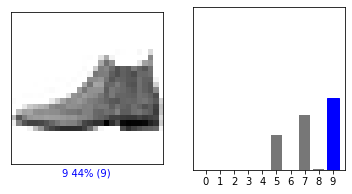

<Figure size 432x288 with 0 Axes>

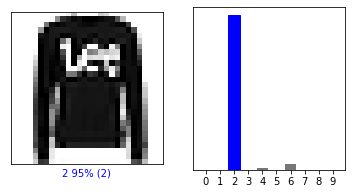

<Figure size 432x288 with 0 Axes>

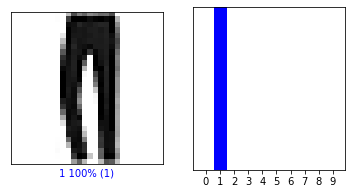

<Figure size 432x288 with 0 Axes>

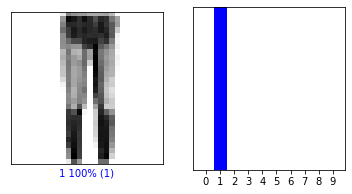

<Figure size 432x288 with 0 Axes>

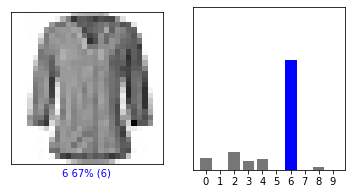

<Figure size 432x288 with 0 Axes>

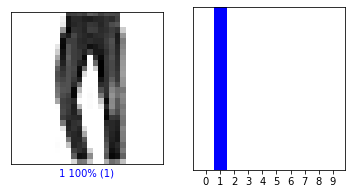

<Figure size 432x288 with 0 Axes>

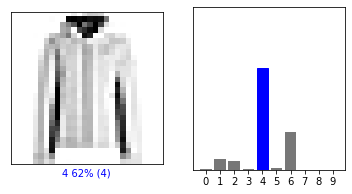

<Figure size 432x288 with 0 Axes>

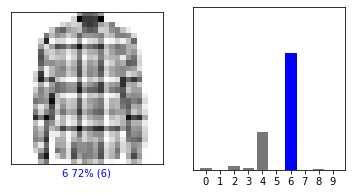

<Figure size 432x288 with 0 Axes>

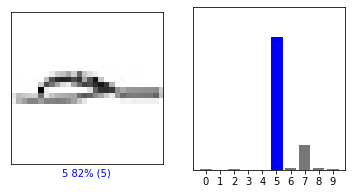

<Figure size 432x288 with 0 Axes>

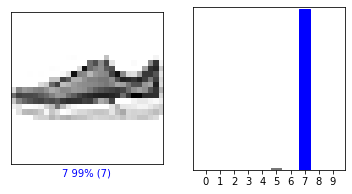

<Figure size 432x288 with 0 Axes>

In [23]:
#Graficamos para ver como se comporta el modelo.
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = model1.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()
  

Para la primera imagen, la red la clasifica correctamente como perteneciente a la categoría 9 con un 44%.
Sin embargo, para la quinta imagen la red identifica que pertenece a la categoría 6 con 67%. Pese a que la clasifica de manera correcta, presenta cierta confusión entre la 6 y la 2 (chaquetas y camisas); error que sería comprensible debido a la semejanza entre las características de ambas categorías.

Generemos una predicción para la sexta imagen.

In [24]:
import numpy as np
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))


=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


Como se puede observar, realiza una predicción correcta.

*Conclusiones caso 2 (con 5 épocas)*:

Debido a los resultados, podemos afirmar que seguimos una pérdida bastante alta. Sin embargo, si comparamos los resultado con el modelo que tenía el optimizador `'sgd'`; es cierto que es preferible el `'rmsprop'` ya que la pérdida es menor y la precisión mayor sin ningún otro cambio en los hiperparámetros.


***Caso 2 (25 épocas)***

In [25]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [26]:
#CASO 2 CON 25 ÉPOCAS

# CONSTRUIMOS LA ARQUITECTURA DE LA RED
# El tipo de red será secuencial.
model1_1 = models.Sequential()
# En el primer caso , la capa 1 tiene 10 neuronas , la función de activación es relu y el optimizador rmsprop.
model1_1.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
model1_1.add(layers.Dense(10, activation='relu'))
#En la capa de salida, la función de activación debe ser softmax ya que queremos que nos devuelva una distribución de probabilidad sobre las 10 clases.
model1_1.add(layers.Dense(10, activation='softmax'))
model1_1.summary()
model1_1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Entrenamos el modelo
model1_1.fit(train_images, train_labels, epochs=25, batch_size=128)
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = model1_1.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 0.9735 - accuracy: 0.6753
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: 0.5560 - accuracy: 0.8107
Epoch 3/25
469/469 [==============================] - 2s 3ms/step - loss: 0.5030 - accuracy: 0.8256
Epoch 4/25
469/4

Para los datos de entrenamiento,obtenemos una pérdida de alrededor de un 36% y una precisión de un 87% aproximadamente.

Al compararlos con los datos de prueba, presenta una pérdida de alrededor de un 42% (más alta que respecto a los datos de entrenamiento) y una precisión de alrededor de un 85% (más baja que respecto a los datos de entrenamiento).

313/313 [==============================] - 1s 2ms/step


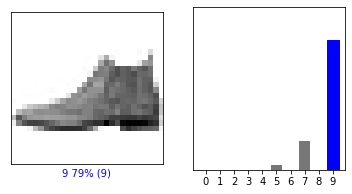

<Figure size 432x288 with 0 Axes>

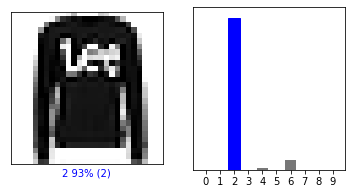

<Figure size 432x288 with 0 Axes>

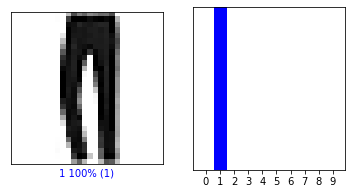

<Figure size 432x288 with 0 Axes>

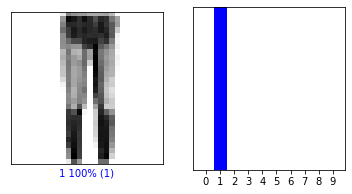

<Figure size 432x288 with 0 Axes>

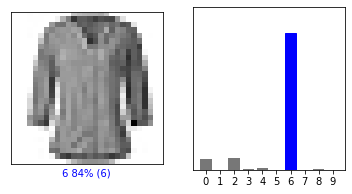

<Figure size 432x288 with 0 Axes>

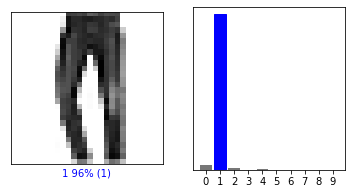

<Figure size 432x288 with 0 Axes>

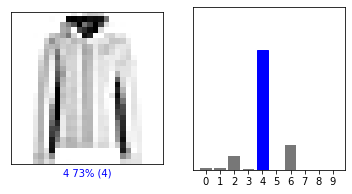

<Figure size 432x288 with 0 Axes>

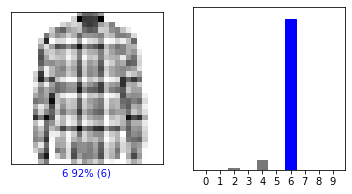

<Figure size 432x288 with 0 Axes>

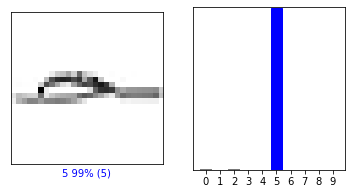

<Figure size 432x288 with 0 Axes>

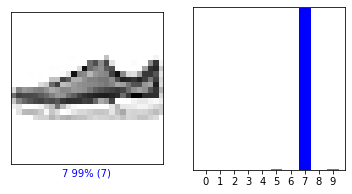

<Figure size 432x288 with 0 Axes>

In [27]:
#Graficamos para ver como se comporta el modelo.
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = model1_1.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Para comenzar, cabe destacar que clasifica correctamente todas las imágenes que se grafican en este conjunto. Además, los porcentajes que indican que pertenece a esa categoría son bastante altos.

In [28]:
import numpy as np
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))

=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.03 0.96 0.01 0.   0.   0.   0.   0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


La red genera una predección correcta sobre la sexta imagen con un 96%.

*Conclusiones caso 2 (25 épocas):*

Al haber aumentado el número de épocas, observamos que la precisión más o menos se mantiene pero la pérdida baja en un 10%.

***Caso 3***

Nº neuronas primera capa:10

Fución de activación: `'sigmoid'`

Optimizador: `'sgd'`

In [29]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [30]:
#CASO 3

# El tipo de red será secuencial.
model2 = models.Sequential()
# En el primer caso , la capa 1 tiene 10 neuronas , la función de activación es sigmoid y el optimizador sgd.
model2.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
model2.add(layers.Dense(10, activation='sigmoid'))
#En la capa de salida, la función de activación debe ser softmax ya que queremos que nos devuelva una distribución de probabilidad sobre las 10 clases.
model2.add(layers.Dense(10, activation='softmax'))
# Al no cambiar el número de neuronas, el summary no cambia.
model2.summary()
model2.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Entrenamos el modelo
model2.fit(train_images, train_labels, epochs=5, batch_size=128)
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                7850      
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 2.3463 - accuracy: 0.1156
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 2.2806 - accuracy: 0.2044
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 2.2580 - accuracy: 0.2643
Epoch 4/5
469/469 [

Para los datos de entrenamiento obtenemos una pérdida muy alta y una precisión de aproximadamente un 40%.

Pese a que en los datos de prueba la precisión aumenta ligeramente y la pérdida disminuye, siguen siendo valores muy poco deseables.

313/313 [==============================] - 1s 2ms/step


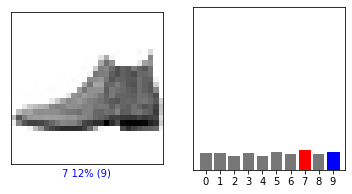

<Figure size 432x288 with 0 Axes>

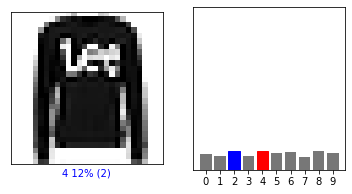

<Figure size 432x288 with 0 Axes>

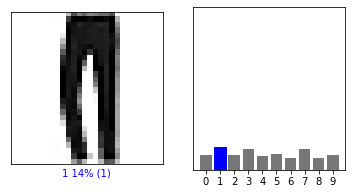

<Figure size 432x288 with 0 Axes>

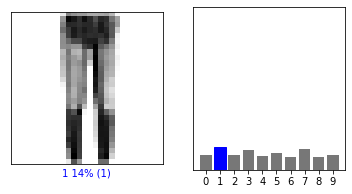

<Figure size 432x288 with 0 Axes>

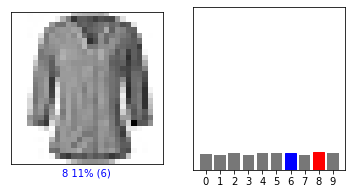

<Figure size 432x288 with 0 Axes>

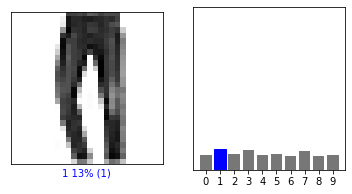

<Figure size 432x288 with 0 Axes>

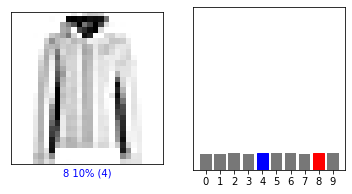

<Figure size 432x288 with 0 Axes>

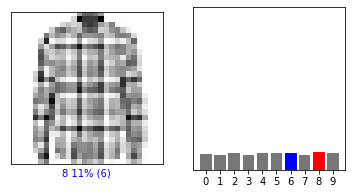

<Figure size 432x288 with 0 Axes>

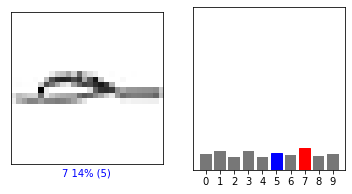

<Figure size 432x288 with 0 Axes>

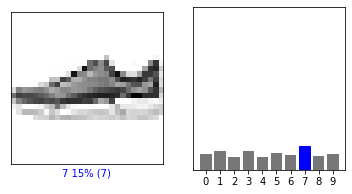

<Figure size 432x288 with 0 Axes>

In [31]:
#Veamos como se comporta la red.
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = model2.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()
  

Pese a que se puede observar que clasifica correctamente algunas imágenes,debemos fijarnos en que los porcentajes de precisión son muy bajos (rondando el 10%) y que la diferencia con respecto a las otras clases es mínima.

Generaremos una predicción sobre la sexta imagen.

In [32]:
import numpy as np
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))


=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.09 0.13 0.1  0.12 0.09 0.1  0.08 0.12 0.08 0.09]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


Aunque predice correctamente , la diferencia entre la categoría 1,3 y 7 es de 0.01.

*Conclusiones caso 3:*

Debido a todo lo mencionado anteriormente, podemos afirmar que este modelo no es efectivo ya que no nos sirve que tenga una precisión tan baja aunque haya imágenes que clasifique correctamente.
Los resultados obtenidos son consecuencia de la función `sigmoid`, ya que no es la función más apropiada para este tipo de datos.


Antes de pasar al caso 4,cambiaremos en el caso 3 el
optimizador por `‘adam’ `y la función de pérdida `‘sparse_categorical_crossentropy’`.

El optimizador Adam es un método de descenso de gradiente estocástico que se basa en la estimación adaptativa de momentos de primer y segundo orden.Como argumentos puede presentar:`learning_rate` (tasa de aprendizaje),`beta_1` ( tasa de caída exponencial para las estimaciones del primer momento),`beta_2` (tasa de caída exponencial para las estimaciones del segundo momento),`epsilon`(constante para la estabilidad numérica),`amsgrad`( booleano) ,`name` (nombre opcional para las operaciones).

La función de pérdida `‘sparse_categorical_crossentropy’` calcula la pérdida entre las etiquetas y las predicciones.Es útil cuando haya dos o más clases de etiquetas.

In [63]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [67]:
#CASO 3

# El tipo de red será secuencial.
#model2_1 = models.Sequential()
# En el primer caso , la capa 1 tiene 10 neuronas , la función de activación es sigmoid y el optimizador adam.
#model2_1.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
#model2_1.add(layers.Dense(10, activation='sigmoid'))
#En la capa de salida, la función de activación debe ser softmax ya que queremos que nos devuelva una distribución de probabilidad sobre las 10 clases.
#model2_1.add(layers.Dense(10, activation='softmax'))
# Al no cambiar el número de neuronas, el summary no cambia.
#model2_1.summary()
#model2_1.compile(optimizer='adam',
 #             loss='sparse_categorical_crossentropy',
  #            metrics=['accuracy'])
#Entrenamos el modelo
#model2_1.fit(train_images, train_labels, epochs=5, batch_size=128)
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
#test_loss, test_acc = model2_1.evaluate(test_images, test_labels)
#print('test_loss:', test_loss)
#print('test_acc:', test_acc)

***Caso 4***

Nº neuronas primera capa:10

Fución de activación: `'sigmoid'`

Optimizador: `'rmsprop'`

In [33]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [34]:
#CASO 4

# El tipo de red será secuencial.
model3 = models.Sequential()
# En el primer caso , la capa 1 tiene 10 neuronas , la función de activación es sigmoid y el optimizador rmsprop.
model3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
model3.add(layers.Dense(10, activation='sigmoid'))
#En la capa de salida, la función de activación debe ser softmax ya que queremos que nos devuelva una distribución de probabilidad sobre las 10 clases.
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()
model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Entrenamos el modelo
model3.fit(train_images, train_labels, epochs=5, batch_size=128)
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = model3.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 1.8751 - accuracy: 0.3830
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 1.3345 - accuracy: 0.5658
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 1.0485 - accuracy: 0.6240
Epoch 4/5
469/469 [

Para los datos de entrenamiento, obtenemos una precisión de un 76% y una pérdida de un 73% aproximadamente.

Si lo comparamos con los datos de prueba,obtenemos una pérdida de un 68%(más baja que con los de entrenamiento) y una precisión de un 76%(algo más alta que con los de entrenamiento).

313/313 [==============================] - 1s 2ms/step


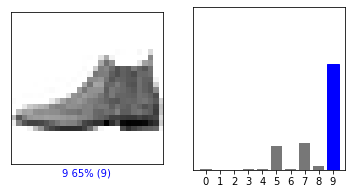

<Figure size 432x288 with 0 Axes>

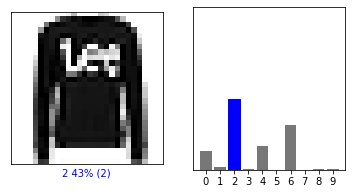

<Figure size 432x288 with 0 Axes>

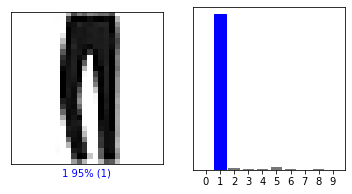

<Figure size 432x288 with 0 Axes>

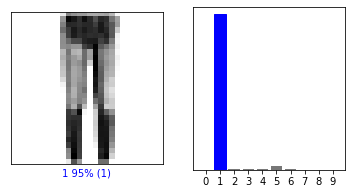

<Figure size 432x288 with 0 Axes>

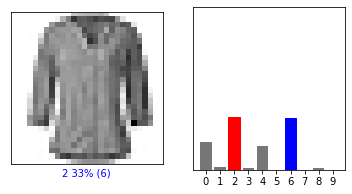

<Figure size 432x288 with 0 Axes>

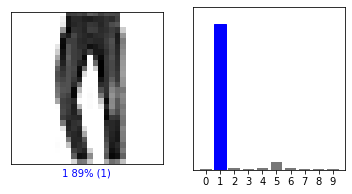

<Figure size 432x288 with 0 Axes>

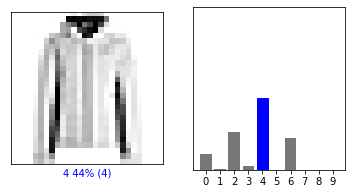

<Figure size 432x288 with 0 Axes>

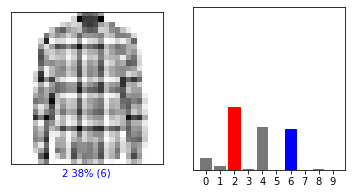

<Figure size 432x288 with 0 Axes>

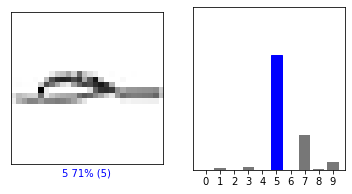

<Figure size 432x288 with 0 Axes>

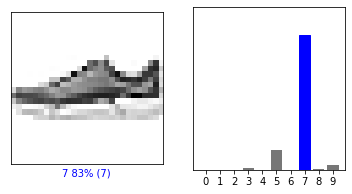

<Figure size 432x288 with 0 Axes>

In [35]:
#Graficamos para ver como se comporta el modelo.
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = model3.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()
  

Para las 10 primeras imágenes, clasifica correctamente todas ellas menos 2.

Generaremos una predicción sobre la sexta imagen.

In [36]:
import numpy as np
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))

=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.   0.89 0.01 0.01 0.01 0.05 0.01 0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


Predice correctamente la sexta imagen con un 89%.

*Conclusiones caso 4:*
Como hemos visto, obtenemos una pérdida muy alta y muy cercana al valor de precisión.

Además, puesto que los dos últimos casos no han resultado efectivos;podemos afirmar que no es conveniente crear una red con 10 neuronas y función de activación `sigmoid`.

***Caso 5***

Nº neuronas primera capa:512

Fución de activación: `'relu'`

Optimizador: `'sgd'`

In [37]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [38]:
# CASO 5

# El tipo de red será secuencial.
model4= models.Sequential()
# En el primer caso , la capa 1 tiene 512 neuronas , la función de activación es relu y el optimizador sgd.
model4.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model4.add(layers.Dense(10, activation='relu'))
#En la capa de salida, la función de activación debe ser softmax ya que queremos que nos devuelva una distribución de probabilidad sobre las 10 clases.
model4.add(layers.Dense(10, activation='softmax'))
#Ahora al cambiar el número de neuronas obtenemos:
#401.920 = 784 x 512 + 512 Sesgo
# 5.130 = 512x10 + 10 Sesgo
# 407.160 = 401.920 + 5.130 +110 (última capa)
model4.summary()
model4.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Entrenamos el modelo
model4.fit(train_images, train_labels, epochs=5, batch_size=128)
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = model4.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dense_16 (Dense)            (None, 10)                5130      
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
Total params: 407,160
Trainable params: 407,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 1.4337 - accuracy: 0.5158
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.7881 - accuracy: 0.7282
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.6414 - accuracy: 0.7811
Epoch 4/5
46

En nuestros datos de entrenamiento obtenemos una pérdida de un 53% aproximadamente y una precisión de 82% aproximadamente.
En la  precisión en nuestro conjunto de prueba es de un 54%  y la pérdida es de un 81%.

313/313 [==============================] - 1s 3ms/step


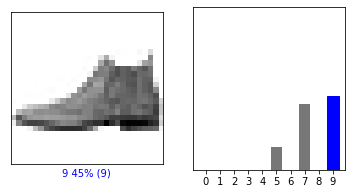

<Figure size 432x288 with 0 Axes>

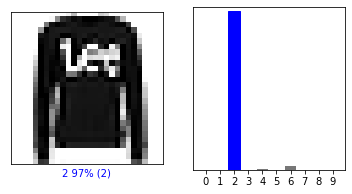

<Figure size 432x288 with 0 Axes>

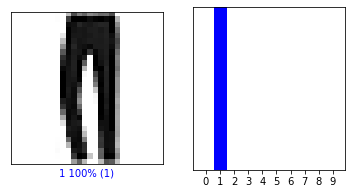

<Figure size 432x288 with 0 Axes>

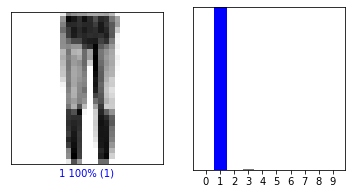

<Figure size 432x288 with 0 Axes>

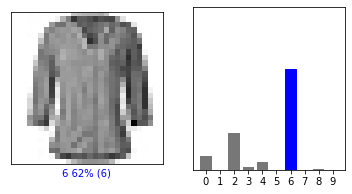

<Figure size 432x288 with 0 Axes>

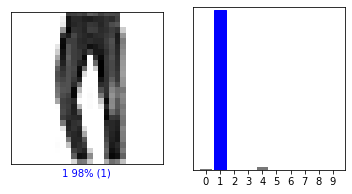

<Figure size 432x288 with 0 Axes>

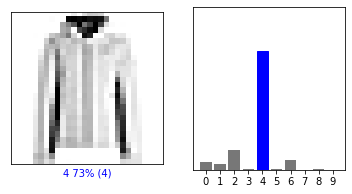

<Figure size 432x288 with 0 Axes>

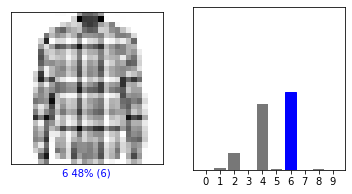

<Figure size 432x288 with 0 Axes>

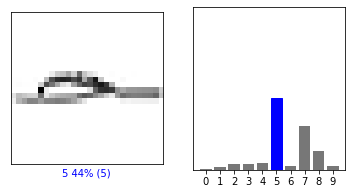

<Figure size 432x288 with 0 Axes>

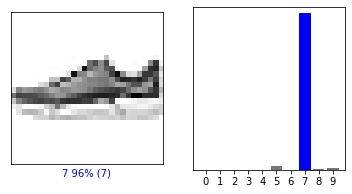

<Figure size 432x288 with 0 Axes>

In [39]:
#Graficamos para ver como se comporta el modelo.
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = model4.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()
  

En la primera imagen obtenemos una precisión de un 45% para el caso 9 que 
equivale a la clase 9, que es un *Ankle boot*.
En la segunda imagen tenemos una precisión de un 97% para el caso 2 que equivale a la clase 2 siendo un *Pullover*.
La siguiente imagen es obtenemos un 100% para la clase 1 que es un *Trouser*.
En la séptima imagen vemos una precisión del 73% de clase 4 que equivale a esa misma clase (*Coat*).
En el resto de las imagenes, cada precisión equivale a la clasificación que se hace de cada articulo: *Shirt* (clase 6) con un 48%, *Sandal* (clase 5) con un 44% y *Sneaker* (clase 7) con un 96%

Generamos una predicción sobre la sexta imagen.

In [40]:
import numpy as np
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))

=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.   0.98 0.   0.   0.02 0.   0.   0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


Como se puede observar, clasifica correctamente con un 98%.

*Conclusiones caso 5:*
Pese a que hemos obtenido una pérdida de un 53% en los de entrenamiento, que todavía se podría considerar bastante alta, hemos obtenido una precisión razonable y hemos mejorado con respecto a los otros modelos creados anteriormente. Una posible mejora sería probar con más épocas.

***Caso 6***

Nº neuronas primera capa:10

Fución de activación: `'relu'`

Optimizador: `'rmsprop'`

In [41]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [42]:
#CASO 6

# El tipo de red será secuencial.
model5 = models.Sequential()
# En el primer caso , la capa 1 tiene 512 neuronas , la función de activación es relu y el optimizador rmsprop.
model5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model5.add(layers.Dense(10, activation='relu'))
#En la capa de salida, la función de activación debe ser softmax ya que queremos que nos devuelva una distribución de probabilidad sobre las 10 clases.
model5.add(layers.Dense(10, activation='softmax'))
model5.summary()
model5.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Entrenamos el modelo
model5.fit(train_images, train_labels, epochs=5, batch_size=128)
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = model5.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
Total params: 407,160
Trainable params: 407,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.8354 - accuracy: 0.7011
Epoch 2/5
469/469 [==============================] - 10s 22ms/step - loss: 0.4256 - accuracy: 0.8469
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.3638 - accuracy: 0.8669
Epoch 4/5


Para los datos de entrenamiento, obtenemos una pérdida de alrededor de un 31% y una precisión de un 88% aproximadamente.

Comparando con el conjunto de prueba, se obtiene una pérdida de un 43% y una precisión de un 84% aproximadamente.

313/313 [==============================] - 1s 3ms/step


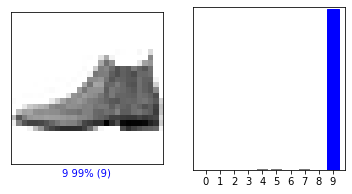

<Figure size 432x288 with 0 Axes>

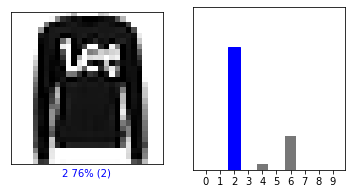

<Figure size 432x288 with 0 Axes>

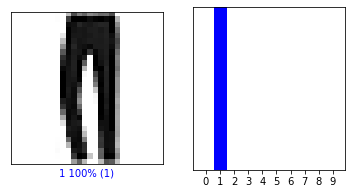

<Figure size 432x288 with 0 Axes>

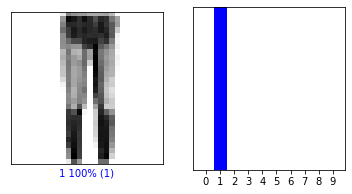

<Figure size 432x288 with 0 Axes>

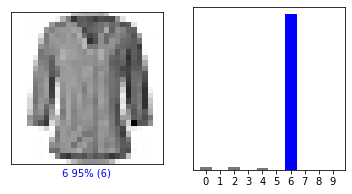

<Figure size 432x288 with 0 Axes>

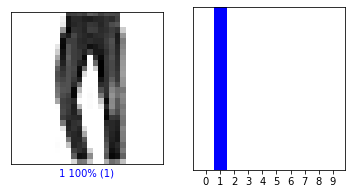

<Figure size 432x288 with 0 Axes>

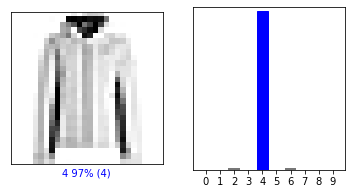

<Figure size 432x288 with 0 Axes>

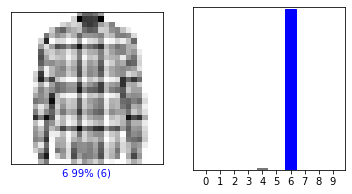

<Figure size 432x288 with 0 Axes>

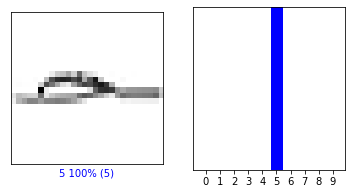

<Figure size 432x288 with 0 Axes>

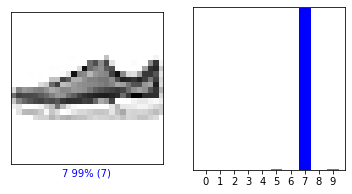

<Figure size 432x288 with 0 Axes>

In [43]:
#Graficamos para ver como se comporta el modelo.
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = model5.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Para este modelo, las 10 primeras imágenes se clasifican correctamente y de una manera mucho más contundente que en el resto de casos.

Generamos una predicción sobre sexta imagen.

In [44]:
import numpy as np
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))

=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


Clasifica correctamente la imagen con un 100%.

*Conclusiones caso 6:*
Debido a los buenos datos tanto de pérdida como de precisión, este modelo es el más eficaz que hemos obtenido hasta ahora.

Si lo comparamos con la red creada con la misma función de activación y optimizador pero 10 neuronas, es cierto que hemos mejorado la pérdida pero tampoco ha sido una mejora muy grande en la precisión para haber añadido más de 500 neuronas a la red.


***Caso 7 (5 épocas)***

Nº neuronas primera capa:512

Fución de activación: `'sigmoid'`

Optimizador: `'sgd'`

In [45]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [46]:
#CASO 7 (5 ÉPOCAS)
# El tipo de red será secuencial.
model6 = models.Sequential()
# En el primer caso , la capa 1 tiene 512 neuronas , la función de activación es sigmoid y el optimizador sgd.
model6.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
model6.add(layers.Dense(10, activation='sigmoid'))
#En la capa de salida, la función de activación debe ser softmax ya que queremos que nos devuelva una distribución de probabilidad sobre las 10 clases.
model6.add(layers.Dense(10, activation='softmax'))
model6.summary()
model6.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Entrenamos el modelo
model6.fit(train_images, train_labels, epochs=5, batch_size=128)
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = model6.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               401920    
                                                                 
 dense_22 (Dense)            (None, 10)                5130      
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
Total params: 407,160
Trainable params: 407,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 2.2675 - accuracy: 0.2158
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 2.1542 - accuracy: 0.3476
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 2.0110 - accuracy: 0.4305
Epoch 4/5
469/4

Obtenemos los siguientes datos de entrenamiento:Datos de entrenamiento de pérdida con un 175%.Datos de entrenamiento de precisión con un 54%. En la precisión de nuestro conjunto de prueba obtenemos los mismos resultados que en los datos de entrenamiento.


313/313 [==============================] - 1s 3ms/step


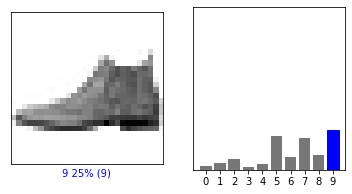

<Figure size 432x288 with 0 Axes>

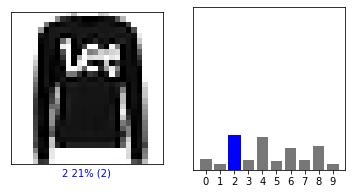

<Figure size 432x288 with 0 Axes>

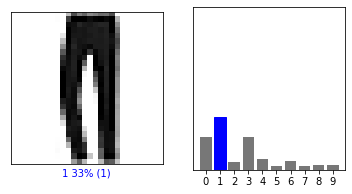

<Figure size 432x288 with 0 Axes>

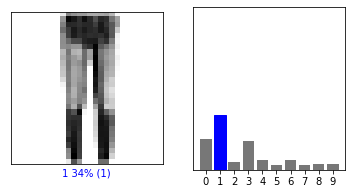

<Figure size 432x288 with 0 Axes>

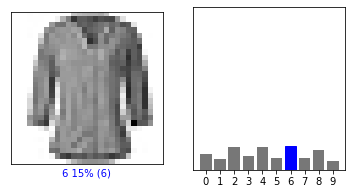

<Figure size 432x288 with 0 Axes>

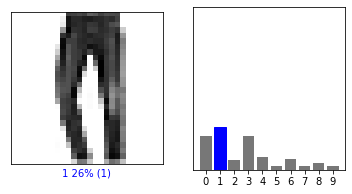

<Figure size 432x288 with 0 Axes>

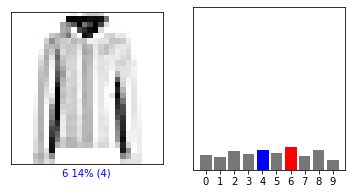

<Figure size 432x288 with 0 Axes>

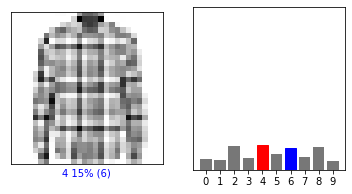

<Figure size 432x288 with 0 Axes>

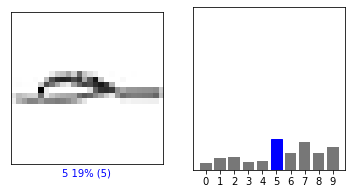

<Figure size 432x288 with 0 Axes>

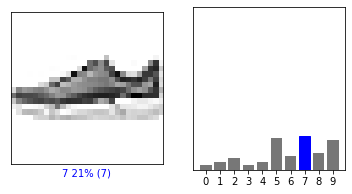

<Figure size 432x288 with 0 Axes>

In [47]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = model6.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Clasifica erróneamente 2 de ellas, pero las que clasifica correctamente no lo hace con un porcentaje alto.

Generamos una predicción sobre la sexta imagen.

In [48]:
import numpy as np
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))

=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.21 0.26 0.06 0.21 0.08 0.02 0.07 0.03 0.04 0.03]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


Pese a que clasifica correctamente la imagen, lo hace con un 26% no muy distante del 21% de la categoría 0 o de la 3.

*Conclusiones Caso 7 (5 épocas)*:
Debido a los datos obtenidos, no es una red muy eficaz.

***Caso 7 (25 épocas)***

In [49]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [50]:
# CASO 7 (25 ÉPOCAS)
# El tipo de red será secuencial.
model6_1 = models.Sequential()
# En el primer caso , la capa 1 tiene 512 neuronas , la función de activación es sigmoid y el optimizador sgd.
model6_1.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
model6_1.add(layers.Dense(10, activation='sigmoid'))
#En la capa de salida, la función de activación debe ser softmax ya que queremos que nos devuelva una distribución de probabilidad sobre las 10 clases.
model6_1.add(layers.Dense(10, activation='softmax'))
model6_1.summary()
model6_1.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Entrenamos el modelo
model6_1.fit(train_images, train_labels, epochs=25, batch_size=128)
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = model6_1.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dense_25 (Dense)            (None, 10)                5130      
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
Total params: 407,160
Trainable params: 407,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
469/469 [==============================] - 5s 9ms/step - loss: 2.2867 - accuracy: 0.1384
Epoch 2/25
469/469 [==============================] - 6s 13ms/step - loss: 2.1727 - accuracy: 0.3478
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 2.0333 - accuracy: 0.4552
Epoch 4/25

Para los datos de entrenamiento, obtenemos una pérdida de un 83% y una precisión de un 72% aproximadamente. Estos datos coinciden al compararlos con los datos de prueba.


313/313 [==============================] - 2s 5ms/step


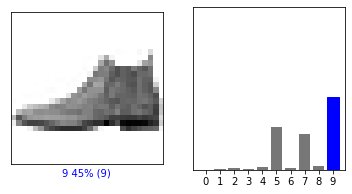

<Figure size 432x288 with 0 Axes>

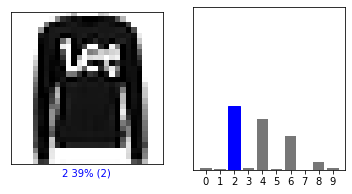

<Figure size 432x288 with 0 Axes>

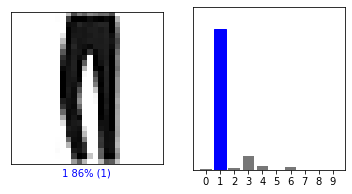

<Figure size 432x288 with 0 Axes>

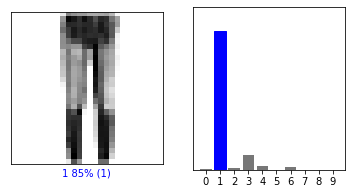

<Figure size 432x288 with 0 Axes>

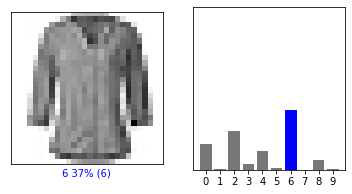

<Figure size 432x288 with 0 Axes>

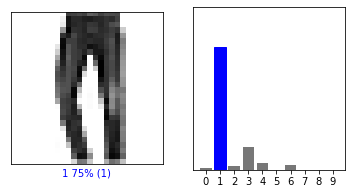

<Figure size 432x288 with 0 Axes>

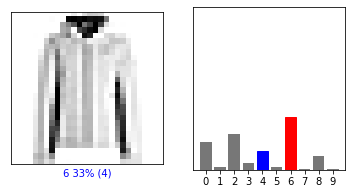

<Figure size 432x288 with 0 Axes>

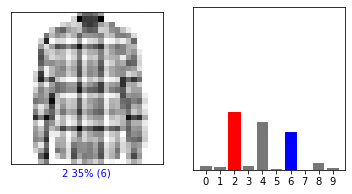

<Figure size 432x288 with 0 Axes>

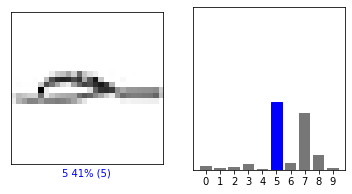

<Figure size 432x288 with 0 Axes>

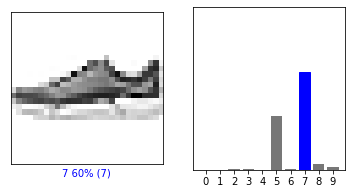

<Figure size 432x288 with 0 Axes>

In [51]:
#Graficamos para ver como se comporta el modelo.
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = model6_1.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()
  

Volvemos a tener un comportamiento muy parecido al que hemos obtenido anteriormente.

Generaremos una predicción sobre la sexta imagen

In [52]:
import numpy as np
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))

=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.01 0.75 0.02 0.14 0.04 0.   0.03 0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


Consigue predecir correctamente la imagen con un 75%. 

*Conclusiones sobre el caso 7 con 25 épocas:*
Al añadir 20 épocas más,observamos que la pérdida disminuye mientras que la precisión aumenta respecto al caso anterior con 5 épocas.Aún así,obtenemos una pérdida bastante alta y una precisión no lo suficiente alta; por lo que tampoco es recomendable.


***Caso 8***

Nº neuronas primera capa:512

Fución de activación: `'sigmoid'`

Optimizador: `'rmsprop'`

In [53]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [54]:
#CASO 8

# El tipo de red será secuencial.
model7= models.Sequential()
# En el primer caso , la capa 1 tiene 512 neuronas , la función de activación es sigmoid y el optimizador rmsprop.
model7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
model7.add(layers.Dense(10, activation='sigmoid'))
#En la capa de salida, la función de activación debe ser softmax ya que queremos que nos devuelva una distribución de probabilidad sobre las 10 clases.
model7.add(layers.Dense(10, activation='softmax'))
model7.summary()
model7.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Entrenamos el modelo
model7.fit(train_images, train_labels, epochs=5, batch_size=128)
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = model7.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               401920    
                                                                 
 dense_28 (Dense)            (None, 10)                5130      
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
Total params: 407,160
Trainable params: 407,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 1.2721 - accuracy: 0.7087
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.7190 - accuracy: 0.8052
Epoch 3/5
469/469 [==============================] - 5s 12ms/step - loss: 0.5306 - accuracy: 0.8340
Epoch 4/5
46

Para los datos de entrenamiento, obtenemos una pérdida de un 40% y una precisión de un 86% aproximadamente.

En el caso de los datos de prueba,la pricisión baja ligeramente (85%) y la pérdida sube ligeramente también (43%).

313/313 [==============================] - 1s 4ms/step


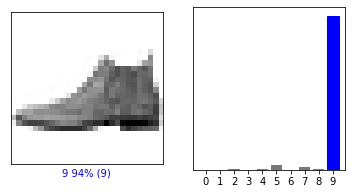

<Figure size 432x288 with 0 Axes>

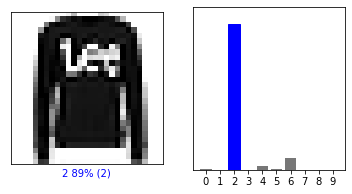

<Figure size 432x288 with 0 Axes>

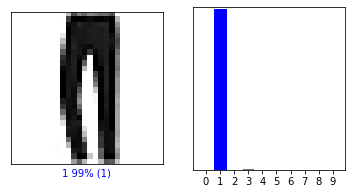

<Figure size 432x288 with 0 Axes>

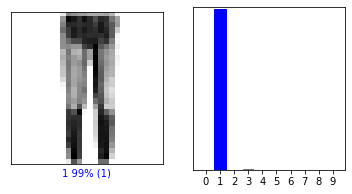

<Figure size 432x288 with 0 Axes>

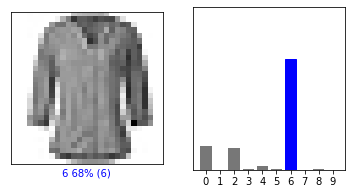

<Figure size 432x288 with 0 Axes>

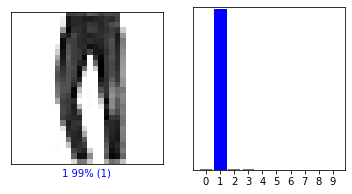

<Figure size 432x288 with 0 Axes>

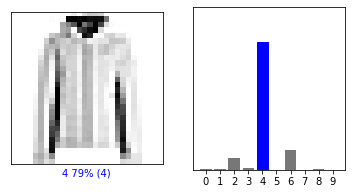

<Figure size 432x288 with 0 Axes>

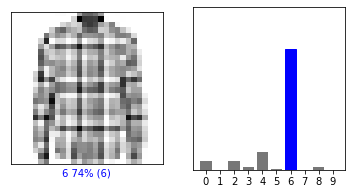

<Figure size 432x288 with 0 Axes>

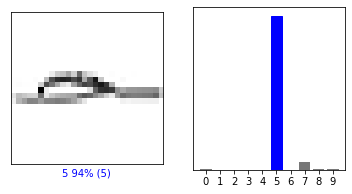

<Figure size 432x288 with 0 Axes>

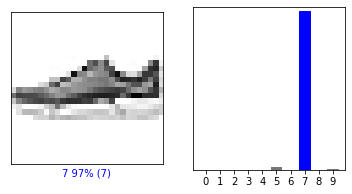

<Figure size 432x288 with 0 Axes>

In [55]:
#Graficamos para ver como se comporta el modelo.
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = model7.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

Para las 10 primeras imágenes, el modelo clasifica bien todas ellas y con porcentajes bastante altos.

Generamos una predicción sobre la sexta imagen.


In [56]:
import numpy as np
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(predictions[5])
print("=======================================================================")
print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
print(np.argmax(predictions[5]))

=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.   0.99 0.   0.01 0.   0.   0.   0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1


Clafica correctamente la imagen con un 99%.

*Conclusiones del caso 8:*
En este caso,siguiendo los datos de pérdia y de precisión, obtenemos un modelo bastante eficiente.